In [2]:
import numpy as np # Algebra lineal
import pandas as pd # Manejo de datos
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Más gráficos
from sklearn.model_selection import train_test_split # Dividir en features y target
from sklearn.naive_bayes import GaussianNB # Modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # Métricas
from sklearn.preprocessing import StandardScaler # Estandarizar datos
from sklearn.datasets import load_wine # Dataset
import warnings # Suprimir warnings

warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8-whitegrid")

In [3]:
# Carga de datos
data = load_wine()

wine = pd.DataFrame(data.data, columns=data.feature_names)

wine["target"] = data.target

In [4]:
# Estructura del dataframe
def estructura_dataframe(df):
    print(f"Cantidad de filas: {df.shape[0]}")
    print(f"Cantidad de columnas: {df.shape[1]}")
    print(f"Cantidad de datos: {df.size}")
    print(f"Columnas: {df.columns}")
    
estructura_dataframe(wine)

Cantidad de filas: 178
Cantidad de columnas: 14
Cantidad de datos: 2492
Columnas: Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


In [5]:
# Primera vista de los datos
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
# Presencia de valores nulos
wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [7]:
# Valores duplicados
wine.duplicated().sum()

0

In [8]:
# Estadísticas del dataset
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [9]:
# Valores únicos por columna
for col in wine.columns:
    print(f"Cantidad de valores únicos en {col}:", wine[col].nunique())

Cantidad de valores únicos en alcohol: 126
Cantidad de valores únicos en malic_acid: 133
Cantidad de valores únicos en ash: 79
Cantidad de valores únicos en alcalinity_of_ash: 63
Cantidad de valores únicos en magnesium: 53
Cantidad de valores únicos en total_phenols: 97
Cantidad de valores únicos en flavanoids: 132
Cantidad de valores únicos en nonflavanoid_phenols: 39
Cantidad de valores únicos en proanthocyanins: 101
Cantidad de valores únicos en color_intensity: 132
Cantidad de valores únicos en hue: 78
Cantidad de valores únicos en od280/od315_of_diluted_wines: 122
Cantidad de valores únicos en proline: 121
Cantidad de valores únicos en target: 3


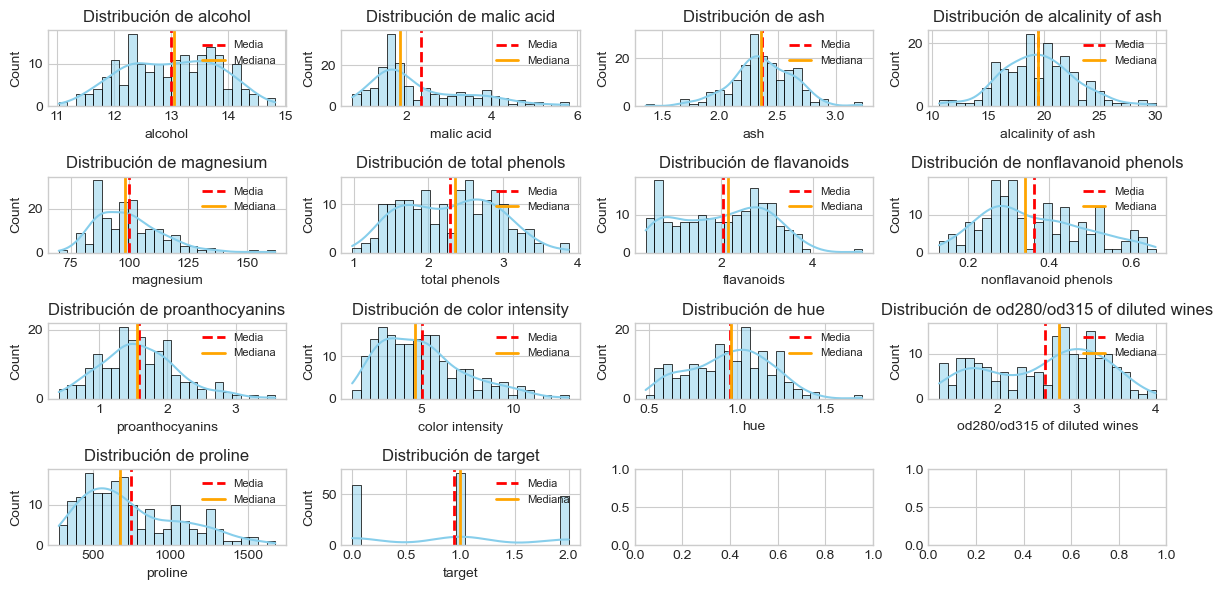

In [10]:
# Análisis univariado
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(wine.columns):
    ax = axes[i]
    sns.histplot(wine, x=col, kde=True, color="skyblue", bins=25, edgecolors="black", ax=ax)
    ax.axvline(wine[col].mean(), color="red", linestyle="--", linewidth=2, label="Media")
    ax.axvline(wine[col].median(), color="orange", linewidth=2, label="Mediana")
    ax.set_title(f"Distribución de {col.replace('_', ' ')}")
    ax.set_xlabel(col.replace("_", " "))
    ax.legend(loc="upper right", frameon=False, fontsize=8)
    
plt.tight_layout()

plt.show()

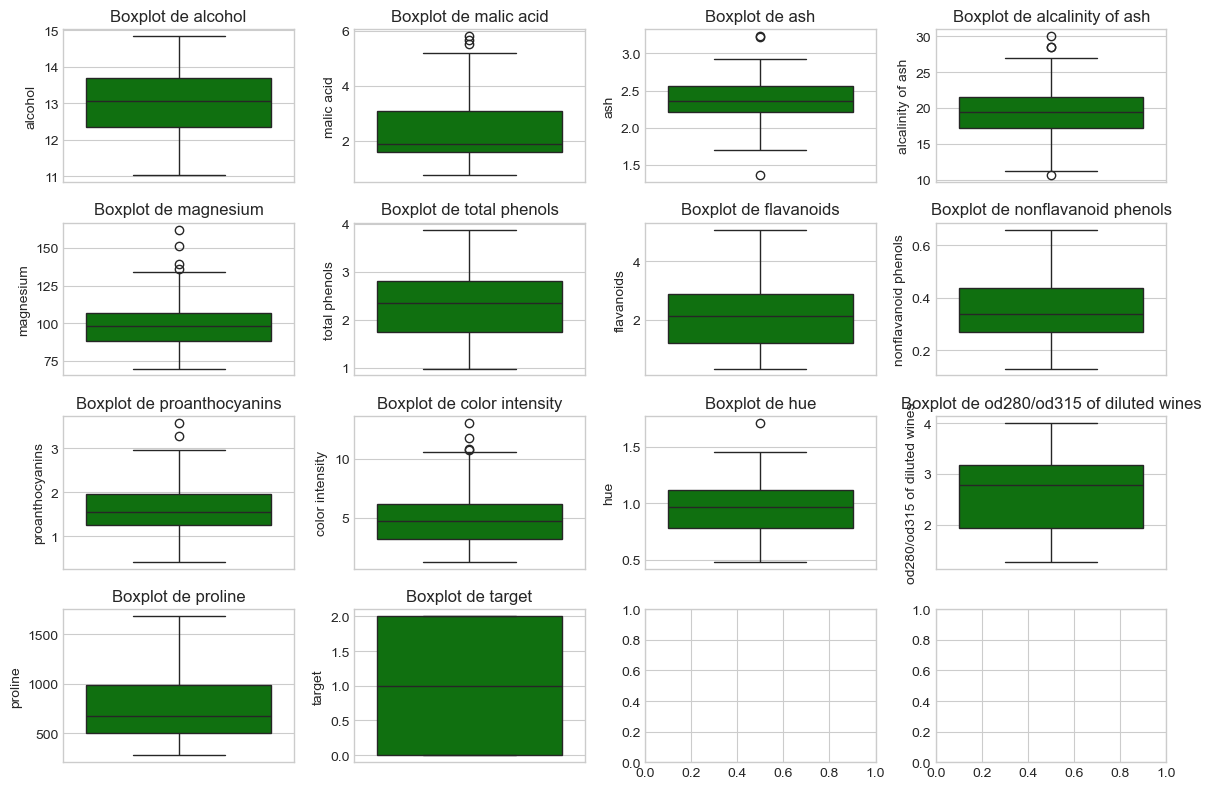

In [11]:
# Análisis univariado
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(wine.columns):
    ax = axes[i]
    sns.boxplot(wine, y=col, color="green", ax=ax)
    ax.set_title(f"Boxplot de {col.replace('_', ' ')}")
    ax.set_ylabel(col.replace("_", " "))
    
plt.tight_layout()

plt.show()

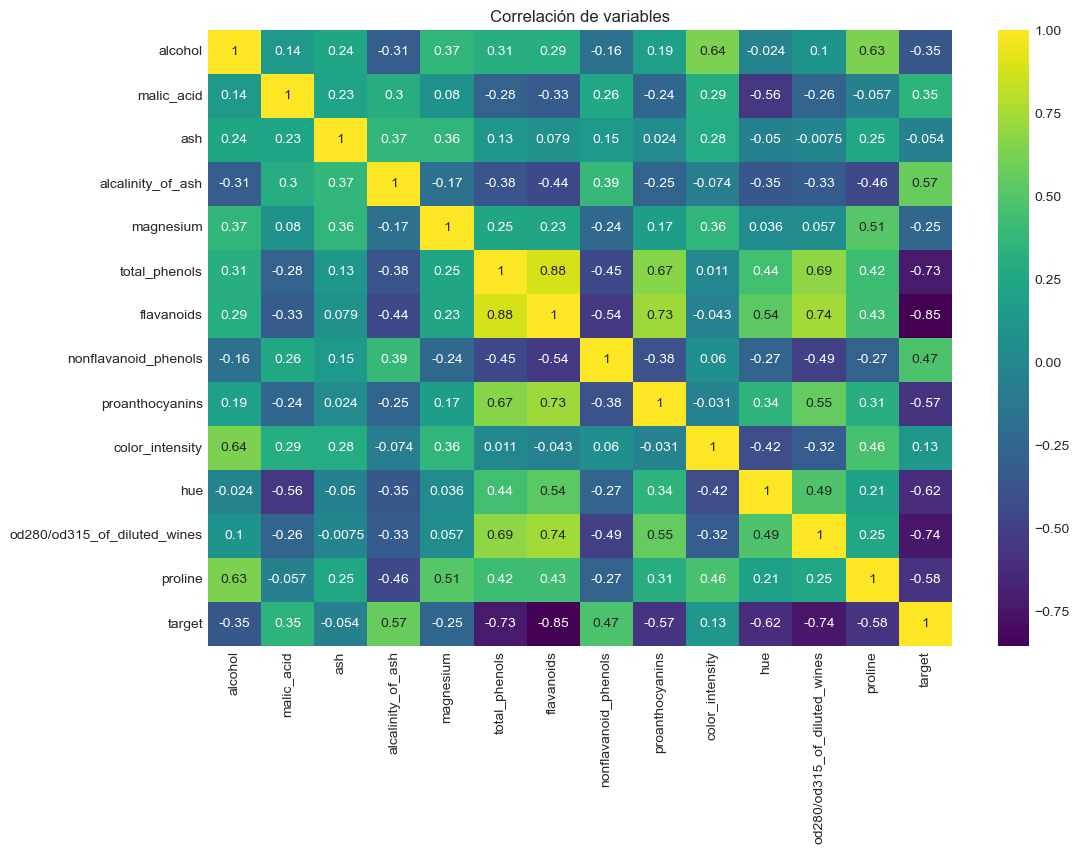

In [12]:
# Análisis bivariado
correlacion = wine.corr(method="spearman") # Spearman: relaciones no lineales
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, cmap="viridis", annot=True)
plt.title("Correlación de variables")

plt.show()

In [13]:
# Información del dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [14]:
# Dividir en features y target
X = wine.drop("target", axis=1)

y = wine["target"]

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [16]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (142, 13)
X_test shape: (36, 13)


In [17]:
# Estandarizar los datos
scaler = StandardScaler()

cols = X_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=cols)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
dtypes: fl

In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       36 non-null     float64
 1   malic_acid                    36 non-null     float64
 2   ash                           36 non-null     float64
 3   alcalinity_of_ash             36 non-null     float64
 4   magnesium                     36 non-null     float64
 5   total_phenols                 36 non-null     float64
 6   flavanoids                    36 non-null     float64
 7   nonflavanoid_phenols          36 non-null     float64
 8   proanthocyanins               36 non-null     float64
 9   color_intensity               36 non-null     float64
 10  hue                           36 non-null     float64
 11  od280/od315_of_diluted_wines  36 non-null     float64
 12  proline                       36 non-null     float64
dtypes: floa

In [20]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-1.450836,-1.279856,0.743060,-0.491365,-0.370780,-0.155583,0.179657,-1.208221,1.291510,-0.844864,-0.749108,0.666749,-0.712474
1,1.347464,-0.757565,-0.211823,-0.842576,-0.296833,-0.155583,0.398383,-0.876208,-0.049017,-0.006570,0.996524,0.295069,1.632453
2,0.684709,0.216198,1.147049,1.411026,0.442645,-1.213825,-1.182406,0.202831,-0.100576,1.566845,-0.978796,-1.163061,-0.002825
3,0.574249,1.110289,-0.689264,-0.052352,-0.814467,-1.099861,-1.540320,1.779890,-1.234868,0.294357,-0.657232,-1.134470,-0.527348
4,-1.058092,-0.642484,-0.248549,0.913477,-0.666572,-0.839370,-0.337330,0.534844,-0.066203,-1.102801,1.731527,-0.505473,-0.789609


In [21]:
X_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-1.045819,-0.784122,0.559429,-0.198690,0.368697,-0.660283,-0.277678,0.700850,-0.977074,-0.887853,2.282779,-0.548359,-1.221570
1,0.316511,-0.615927,1.697943,-1.223054,0.812384,0.495642,0.646934,-0.212184,-0.409928,-0.178527,0.629023,0.237887,0.398281
2,-0.849447,-1.093956,-0.358728,-1.076716,0.146854,-0.399793,-0.933854,2.194905,-2.042621,-0.750287,1.364025,-1.348901,-0.218805
3,1.470196,1.464384,0.485976,-1.896208,2.143444,1.146868,1.004849,-1.374227,0.827481,0.036420,-0.289731,1.310041,0.028030
4,0.009680,-1.271003,-2.452125,-1.076716,-0.962363,-0.562599,0.000700,-1.042215,-0.238066,-0.178527,1.088399,-0.190974,-1.107409


In [22]:
# Modelo GaussianNB
modelo = GaussianNB()
# Ajustar el modelo al set de entrenamiento
modelo.fit(X_train, y_train)
# Predicciones del modelo
y_pred = modelo.predict(X_test)

In [23]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9722222222222222


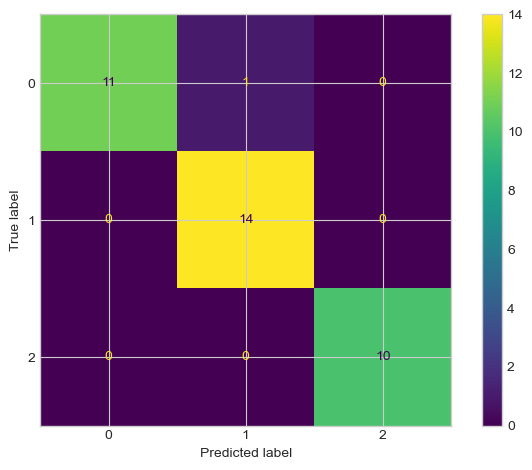

In [24]:
# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_mat)

disp.plot(cmap="viridis")

plt.tight_layout()
plt.show()

In [25]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

cv_results = cross_val_score(modelo, X_train, y_train, cv=kfold, scoring="accuracy")

print("Resultados de la validación cruzada:\n", cv_results, "\n")
print("Promedio de accuracy de la validación cruzada:", cv_results.mean())

Resultados de la validación cruzada:
 [1.         1.         0.85714286 0.92857143 0.92857143 0.92857143
 0.92857143 1.         1.         1.        ] 

Promedio de accuracy de la validación cruzada: 0.9571428571428571
